## MNIST Dataset

In [2]:
import tensorflow as tf
import keras

In [2]:
fashion_mnist =  keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

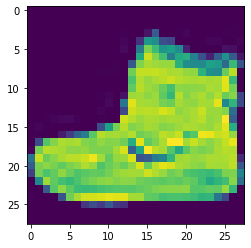

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_img[0])
print(train_labels[0])
print(train_img[0])

In [12]:
train_img = train_img/255.0
test_img = test_img/255.0

In [11]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')
                          ])

In [13]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')
model.fit(train_img, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6217
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3831
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3151
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945


In [14]:
model.evaluate(test_img, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3643


0.36432188749313354

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print('\nLoss is low so cancellling training!')
      self.model.stop_training = True
      # if(logs.get('acc') >= 0.95):
        #        print("Reached 95% accuracy so cancelling training!")
         #       self.model.stop_training = True

In [19]:
callbacks = myCallback()
mnist =  keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()
train_img = train_img/255.0
test_img = test_img/255.0
model1 = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(512, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')
                          ])
model1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')
model1.fit(train_img, train_labels, epochs=5,  callbacks=callbacks)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5767
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3623

Loss is low so cancellling training!


## Improving with convolution

In [3]:
mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = keras.models.Sequential([
  keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Conv2D(64, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
___________________________________________________________

In [4]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


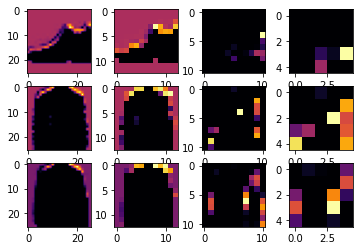

In [10]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [11]:
import tensorflow as tf
print(tf.__version__)
mnist = keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = keras.models.Sequential([
  keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.4.1
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0190 - accuracy: 0.9940
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0126 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0062 - accuracy: 0.9981
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0057 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 10/10